In [2]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
import math

%matplotlib inline

In [3]:
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# Utility Functions

- Mean Square
- Sigmoid
- Soft Max
- Cross Entropy
- tanh


In [17]:
# Mean Square Error
def mse(y_true,y_pred):
    total = 0
    n = len(y_true)
    for y,y1 in zip(y_true,y_pred):
        total+=(y-y1)**2
    avg = total/n
    return avg

# Sigmoid Activation Fn()
def sigmoid(n):
    """
    Sigmoid function applied element wise F(X) = [f(x0),f(x1),f(x2)]
    Used to convert values in the range of 0 to 1

    Attributes
    - n(np.Array | int)

    Return
    np.Array | int
    """
    return 1.0 / (1 + np.exp(-n))

#Softmax Output Fn()
def softmax(X):
    return np.exp(X) / np.sum(np.exp(X))

# Log Loss or binary Cross Entropy
def crossEntropy(Y):
    total = 0
    n = len(Y)
    for y in Y:
        total+=(y*np.log(y)+(1-y)*np.log((1-y)))
    return (-1*total)/n

# tanh
def tanh(z):
    # return np.tanh(z)
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

#Relu
def reLu(z):
    return np.maximum(z,0.0)



# Question-1


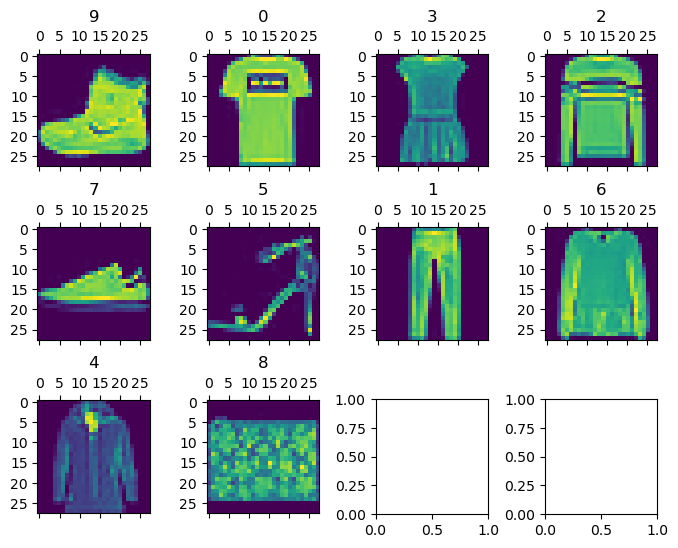

In [5]:
X = X_train
Y = y_train
countHash = dict()
total_items = 0
for i in range(len(Y)):
  try:
    if countHash[Y[i]]:
      continue
  except:
    total_items+=1
    countHash[Y[i]] = i

import math

subplot_y = math.ceil(math.sqrt(total_items))
subplot_x = math.ceil(total_items / subplot_y)
fig, axs = plt.subplots(subplot_x, subplot_y,figsize=(8, 6))
# Now you can plot on each subplot using axs[row_index, col_index]
i, j = 0, 0
for item in countHash:
  axs[i, j].matshow(X_train[countHash[item]])
  axs[i, j].set_title(y_train[countHash[item]]);
  j+=1
  if j==subplot_y :
    i +=1
    j = 0
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Question-2


In [6]:
X_train_reshaped = X_train.reshape(len(X_train),-1)
X_test_reshaped = X_test.reshape(len(X_test),-1)

X_train_scaled = X_train_reshaped / 256
X_test_scaled = X_test_reshaped / 256

print(X_train_scaled.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [19]:

def linearFn(weight,input,bias):
  # weights can be matrix of n*n and input is 1D array
  # we can't change order becase we are multiplying N*N  X  N*1 => N*1
  return np.dot(weight,input)+bias


class Layer:
    '''
    This will create a Single layer with weight bias and.

    Attributes
    - weights (np.Array) : Weights associated with given layer
    - biases (np.Array) : Biases associated with given layer
    - a : np.dot(weights,inputs)+biases
    - h : a with activation function
    '''
    def __init__(self,n_inputs,n_neurons):
        '''
        Initialize weights and biases

        Params
        - n_inputs (int) : size of input that will feed to this layer
        - n_neurons(int) : no of neuron in this layer
        '''
        self.weights = 0.10 * np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))

    def calculate(self,inputs):
        self.a = np.dot(inputs,self.weights) + self.biases

class NeuralNetwork:
  '''
    This will create Model.

    Attributes
    - hidden_layers (List[Layer]) :
    - input_layer_neuron(int) :
    - output_layer_neuron(int) :
    - epochs(int) : No. of times algo will run to converge, default value 1000

  '''
  def __init__(self,hidden_layers,input_layer_neuron,output_layer_neuron,epochs=1000):
    self.input_layer_neuron = input_layer_neuron
    self.output_layer_neuron = output_layer_neuron
    self.hidden_layers = hidden_layers
    self.network = list()
    self.epochs = epochs
    # First Layer
    self.network.append(Layer(input_layer_neuron,hidden_layers[0]))

    # Middle layers
    for i in range(0,len(hidden_layers)-1):
      self.network.append(Layer(hidden_layers[i],hidden_layers[i+1]))

    #Last layer
    self.network.append(Layer(hidden_layers[-1],output_layer_neuron))

  def forword_propogation(self,input_x):
    temp_input = input_x.copy()
    # Run for every layer
    for layer in self.network:
      layer.calculate(temp_input)
      layer.h = sigmoid(layer.a)
      temp_input = layer.h
    self.y_cap = softmax(temp_input)
    
  def backword_propogation(self,true_y):
    one_hot_y = np.eye(np.max(true_y) + 1)[true_y]
    # print(one_hot_y)
    l_theta_wrt_a_l = self.y_cap - one_hot_y 
    
    for i in range(len(self.network)-1,-1,-1):
        self.del

model = NeuralNetwork(input_layer_neuron=len(X_train_reshaped[0]),output_layer_neuron=10,hidden_layers=[32,32,8],epochs=1)
# model.forword_propogation(X_train_reshaped)
model.backword_propogation(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
